In [4]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [5]:
# Download training dataset
dataset = MNIST(root='data/',download=True)

1.7%

100.0%


Extracting data/MNIST\raw\train-images-idx3-ubyte.gz to data/MNIST\raw



100.0%
2.0%

Extracting data/MNIST\raw\train-labels-idx1-ubyte.gz to data/MNIST\raw



100.0%


Extracting data/MNIST\raw\t10k-images-idx3-ubyte.gz to data/MNIST\raw



100.0%


Extracting data/MNIST\raw\t10k-labels-idx1-ubyte.gz to data/MNIST\raw



In [6]:
len(dataset)

60000

In [7]:
test_dataset = MNIST(root='data/',train=False)
len(test_dataset)

10000

In [8]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
''' 
The statement %matplotlib inline indicates to Jupyter that we want to plot the graphs within the notebook. Without this line, Jupyter will show the image in a popup. Statements starting with % are called magic commands and are used to configure the behavior of Jupyter itself. 
'''

' \nThe statement %matplotlib inline indicates to Jupyter that we want to plot the graphs within the notebook. Without this line, Jupyter will show the image in a popup. Statements starting with % are called magic commands and are used to configure the behavior of Jupyter itself. \n'

Label :  5


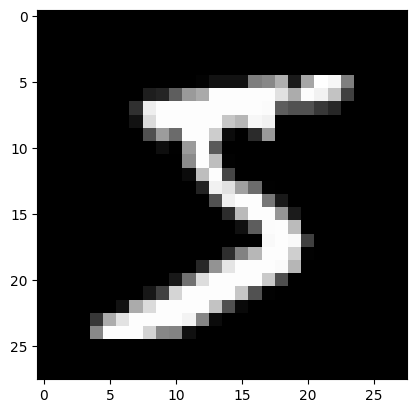

In [10]:
image,label = dataset[0]
plt.imshow(image,cmap='gray')
print('Label : ',label)

Label :  3


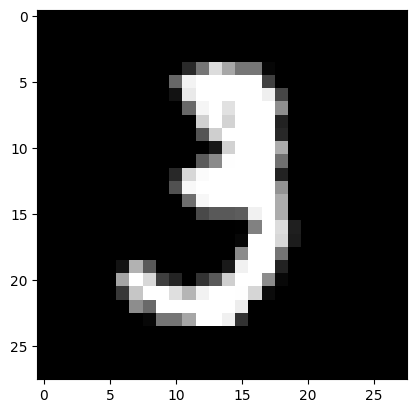

In [11]:
image,label=dataset[10]
plt.imshow(image,cmap='gray')
print('Label : ',label)

In [12]:
import torchvision.transforms as transforms

In [13]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())

In [14]:
img_tensor,label=dataset[0]
print(img_tensor.shape,label)
'''
The image is now converted to a 1x28x28 tensor. The first dimension tracks color channels. The second and third dimensions represent pixels along the height and width of the image, respectively. Since images in the MNIST dataset are grayscale, there's just one channel. Other datasets have images with color, in which case there are three channels: red, green, and blue (RGB).


'''

torch.Size([1, 28, 28]) 5


In [15]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


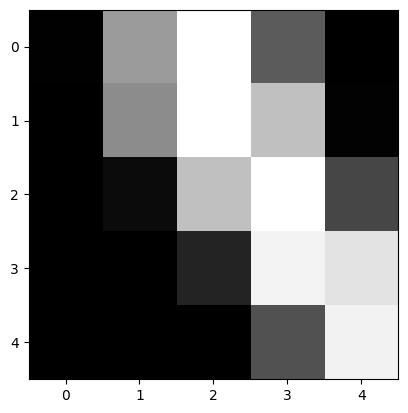

In [16]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray')

In [17]:
'''
Training and Validation Datasets
While building real-world machine learning models, it is quite common to splite the datasets into three parts:
1. Training set - used to train the model i.e. compute the loss and adjust the model's weights using gradient descent.
2. Validation set - used to evaluate the model during training, adjust hyperparameters (learning rate,etc.) and pick the best version of the model.
3. Test set - used to compare different models or approaches and report the model's final accuracy.
'''

"\nTraining and Validation Datasets\nWhile building real-world machine learning models, it is quite common to splite the datasets into three parts:\n1. Training set - used to train the model i.e. compute the loss and adjust the model's weights using gradient descent.\n2. Validation set - used to evaluate the model during training, adjust hyperparameters (learning rate,etc.) and pick the best version of the model.\n3. Test set - used to compare different models or approaches and report the model's final accuracy.\n"

In [18]:
from torch.utils.data import random_split
train_ds, val_ds = random_split(dataset, [50000,10000])
len(train_ds),len(val_ds)

(50000, 10000)

In [19]:
from torch.utils.data import DataLoader
batch_size = 128
train_loader = DataLoader(train_ds,batch_size,shuffle=True)
val_loader = DataLoader(val_ds,batch_size)
'''
We set shuffle=True for the training data loader to ensure that the batches generated in each epoch are different. This randomization helps generalize & speed up the training process. On the other hand, since the validation data loader is used only for evaluating the model, there is no need to shuffle the images.
'''

In [ ]:
'''
Model
1. A logistic regression model is almost identical to a linear regression model. It contains weights and bias matrices, and the output is obtained using simple matrix operations (pred = x @ w.t() + b).

2. As we did with linear regression, we can use nn.Linear to create the model instead of manually creating and initializing the matrices.

3. Since nn.Linear expects each training example to be a vector, each 1x28x28 image tensor is flattened into a vector of size 784 (28*28) before being passed into the model.

4.The output for each image is a vector of size 10, with each element signifying the probability of a particular target label (i.e., 0 to 9). The predicted label for an image is simply the one with the highest probability.
'''

In [21]:
import torch.nn as nn
input_size = 28*28
num_classes = 10
# Logistic regression model
model = nn.Linear(input_size,num_classes)

In [22]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0169, -0.0279, -0.0002,  ..., -0.0252,  0.0121,  0.0231],
        [-0.0181, -0.0296,  0.0294,  ..., -0.0243, -0.0156, -0.0333],
        [ 0.0253,  0.0274,  0.0322,  ..., -0.0280,  0.0229, -0.0345],
        ...,
        [-0.0318, -0.0298, -0.0138,  ...,  0.0113, -0.0227,  0.0221],
        [-0.0297, -0.0072,  0.0306,  ..., -0.0056, -0.0343, -0.0267],
        [ 0.0154, -0.0250,  0.0203,  ...,  0.0144,  0.0251,  0.0273]],
       requires_grad=True)

In [23]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0233, -0.0065, -0.0102, -0.0210, -0.0075, -0.0170, -0.0136, -0.0006,
         0.0121,  0.0019], requires_grad=True)

In [24]:
for images,labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([2, 7, 4, 6, 7, 2, 0, 2, 3, 4, 7, 9, 9, 6, 4, 9, 0, 1, 3, 5, 0, 0, 3, 3,
        4, 7, 5, 5, 0, 4, 8, 7, 4, 0, 9, 1, 8, 3, 2, 9, 3, 6, 2, 0, 3, 7, 9, 1,
        4, 6, 3, 9, 5, 5, 4, 6, 6, 4, 8, 8, 4, 6, 6, 0, 6, 0, 7, 7, 6, 4, 3, 8,
        7, 8, 9, 3, 2, 4, 4, 8, 5, 2, 5, 7, 6, 4, 7, 0, 1, 5, 2, 4, 2, 3, 5, 4,
        0, 8, 3, 3, 1, 8, 6, 9, 3, 0, 8, 7, 1, 5, 5, 4, 1, 5, 0, 1, 3, 5, 7, 5,
        7, 8, 7, 4, 1, 0, 4, 6])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [25]:
images.shape

torch.Size([128, 1, 28, 28])

In [26]:
images.reshape(128,784).shape

torch.Size([128, 784])

In [27]:
class Person:
    # Class constructor
    def __init__(self,name,age):
        # Object properties
        self.name = name
        self.age = age
    
    # Method
    def say_hello(self):
        print("Hello my name is "+self.name + " ! ")

In [28]:
bob = Person("Bob",32)

In [29]:
bob.name,bob.age

('Bob', 32)

In [30]:
bob.say_hello()

Hello my name is Bob ! 


In [39]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self,xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)
        return out

model = MnistModel()

In [33]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [38]:
print(model.linear.weight.shape,model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0324, -0.0295,  0.0324,  ..., -0.0242, -0.0225, -0.0050],
         [ 0.0060,  0.0083, -0.0309,  ...,  0.0249, -0.0300,  0.0169],
         [ 0.0145, -0.0048, -0.0043,  ...,  0.0275,  0.0320,  0.0097],
         ...,
         [ 0.0254, -0.0191,  0.0209,  ..., -0.0137,  0.0191, -0.0185],
         [ 0.0187,  0.0065, -0.0326,  ..., -0.0039, -0.0102,  0.0159],
         [-0.0309,  0.0021,  0.0190,  ...,  0.0134, -0.0007,  0.0181]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0275,  0.0013, -0.0338,  0.0298, -0.0212, -0.0208, -0.0185, -0.0124,
         -0.0164, -0.0169], requires_grad=True)]

In [40]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.0562,  0.1583, -0.0732, -0.2869, -0.1447, -0.2206, -0.0105, -0.1361,
          0.1509, -0.1326],
        [ 0.2360,  0.1864, -0.0885, -0.2170, -0.1244, -0.1818, -0.0679,  0.1214,
         -0.0614,  0.0097]])


In [42]:
import torch.nn.functional as F

In [43]:
outputs[:2]

tensor([[-0.0562,  0.1583, -0.0732, -0.2869, -0.1447, -0.2206, -0.0105, -0.1361,
          0.1509, -0.1326],
        [ 0.2360,  0.1864, -0.0885, -0.2170, -0.1244, -0.1818, -0.0679,  0.1214,
         -0.0614,  0.0097]], grad_fn=<SliceBackward0>)

In [44]:
# Apply softmax for each output row
probs = F.softmax(outputs,dim=1)

# Look at sample probabilities
print("Sample probabilities : \n",probs[:2].data)

# Add up the probabilities of an output row
print("Sum : ",torch.sum(probs[0]).item())

Sample probabilities : 
 tensor([[0.1009, 0.1251, 0.0992, 0.0801, 0.0924, 0.0856, 0.1057, 0.0932, 0.1242,
         0.0935],
        [0.1276, 0.1214, 0.0923, 0.0811, 0.0890, 0.0840, 0.0942, 0.1138, 0.0948,
         0.1018]])
Sum :  1.0


In [45]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([1, 0, 2, 2, 7, 7, 1, 7, 7, 9, 2, 2, 8, 2, 8, 8, 6, 6, 7, 8, 0, 7, 6, 7,
        7, 8, 2, 8, 0, 8, 1, 2, 7, 2, 7, 8, 9, 8, 8, 2, 8, 2, 0, 8, 2, 8, 2, 7,
        3, 1, 8, 8, 4, 8, 6, 8, 8, 9, 6, 1, 1, 2, 4, 8, 6, 6, 1, 2, 2, 0, 2, 8,
        7, 2, 1, 8, 8, 8, 1, 1, 8, 8, 3, 5, 1, 1, 8, 1, 7, 1, 7, 1, 4, 5, 8, 6,
        8, 2, 8, 5, 7, 2, 8, 2, 2, 2, 2, 8, 2, 3, 0, 2, 1, 2, 2, 6, 1, 7, 4, 9,
        1, 1, 1, 8, 2, 8, 8, 7])
tensor([0.1251, 0.1276, 0.1346, 0.1403, 0.1180, 0.1356, 0.1558, 0.1102, 0.1200,
        0.1162, 0.1451, 0.1259, 0.1207, 0.1256, 0.1256, 0.1582, 0.1173, 0.1374,
        0.1265, 0.1260, 0.1276, 0.1092, 0.1476, 0.1197, 0.1287, 0.1166, 0.1277,
        0.1280, 0.1238, 0.1399, 0.1380, 0.1252, 0.1627, 0.1259, 0.1401, 0.1256,
        0.1246, 0.1335, 0.1264, 0.1451, 0.1329, 0.1322, 0.1155, 0.1372, 0.1184,
        0.1166, 0.1267, 0.1377, 0.1201, 0.1271, 0.1160, 0.1471, 0.1236, 0.1291,
        0.1241, 0.1324, 0.1326, 0.1288, 0.1294, 0.1381, 0.1248, 0.1360, 0.1241,
       

In [46]:
labels

tensor([9, 3, 9, 2, 9, 9, 3, 9, 6, 3, 7, 1, 9, 4, 5, 4, 7, 0, 6, 9, 8, 1, 0, 4,
        7, 6, 9, 0, 1, 9, 9, 8, 6, 5, 0, 8, 4, 8, 5, 0, 4, 5, 8, 7, 1, 7, 5, 4,
        5, 0, 4, 6, 6, 0, 5, 2, 9, 8, 0, 0, 2, 2, 5, 0, 4, 0, 3, 2, 9, 8, 4, 8,
        1, 1, 9, 4, 6, 8, 8, 7, 6, 2, 5, 2, 3, 9, 6, 7, 8, 5, 0, 8, 9, 4, 1, 5,
        4, 1, 2, 4, 4, 4, 4, 0, 1, 2, 7, 8, 4, 1, 2, 1, 0, 7, 6, 6, 3, 5, 4, 3,
        7, 3, 5, 0, 9, 6, 6, 4])

In [47]:
# Evaluation Metric and Loss Function
# Just as with linear regression, we need a way to evaluate how well our model is performing. A natural way to do yhis would be to find the percentage of labels that were predicted correctly, i.e. , the accuracy of the predictions.
outputs[:2]

tensor([[-0.0562,  0.1583, -0.0732, -0.2869, -0.1447, -0.2206, -0.0105, -0.1361,
          0.1509, -0.1326],
        [ 0.2360,  0.1864, -0.0885, -0.2170, -0.1244, -0.1818, -0.0679,  0.1214,
         -0.0614,  0.0097]], grad_fn=<SliceBackward0>)

In [48]:
torch.sum(preds == labels)

tensor(12)

In [49]:
def accuracy(outputs,labels):
    _, preds = torch.max(outputs,dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [50]:
accuracy(outputs,labels)

tensor(0.0938)

In [51]:
probs

tensor([[0.1009, 0.1251, 0.0992,  ..., 0.0932, 0.1242, 0.0935],
        [0.1276, 0.1214, 0.0923,  ..., 0.1138, 0.0948, 0.1018],
        [0.0994, 0.1081, 0.1346,  ..., 0.0995, 0.0895, 0.1002],
        ...,
        [0.0906, 0.0991, 0.0907,  ..., 0.1056, 0.1276, 0.1219],
        [0.0836, 0.0865, 0.0892,  ..., 0.1153, 0.1312, 0.0951],
        [0.0728, 0.1154, 0.0819,  ..., 0.1385, 0.1354, 0.1265]],
       grad_fn=<SoftmaxBackward0>)

In [52]:
outputs

tensor([[-0.0562,  0.1583, -0.0732,  ..., -0.1361,  0.1509, -0.1326],
        [ 0.2360,  0.1864, -0.0885,  ...,  0.1214, -0.0614,  0.0097],
        [-0.0041,  0.0800,  0.2997,  ..., -0.0029, -0.1090,  0.0043],
        ...,
        [-0.1615, -0.0713, -0.1603,  ..., -0.0080,  0.1810,  0.1354],
        [-0.1392, -0.1052, -0.0744,  ...,  0.1818,  0.3109, -0.0104],
        [-0.2993,  0.1618, -0.1811,  ...,  0.3439,  0.3212,  0.2534]],
       grad_fn=<AddmmBackward0>)

In [53]:
loss_fn = F.cross_entropy

In [55]:
# Loss for current batch of data
loss = loss_fn(outputs,labels)
print(loss)
# We know that cross-entropy is the negative logarithm of the predicted probability of the correct label averaged over all training samples. Therefore, one way to interpret the resulting number e.g. 2.23 is look at e^-2.23 which is around 0.1 as the predicted probability of the correct label, on average. The lower the loss, The better the model.

tensor(2.3684, grad_fn=<NllLossBackward0>)


In [56]:
''' 
Training the model
Now that we have defined the data loaders, model, loss function and optimizer, we are ready to train the model. The training process is identical to linear regression, with the addition of a "validation phase" to evaluate the model in each epoch. Here's what it looks like in pseudocode:

for epoch in range(num_epochs):
    # Training phase
    for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
    
    # Validation phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection
Some parts of the training loop are specific the specific problem we're solving (e.g. loss function, metrics etc.) whereas others are generic and can be applied to any deep learning problem.
'''

' \nTraining the model\nNow that we have defined the data loaders, model, loss function and optimizer, we are ready to train the model. The training process is identical to linear regression, with the addition of a "validation phase" to evaluate the model in each epoch. Here\'s what it looks like in pseudocode:\n\nfor epoch in range(num_epochs):\n    # Training phase\n    for batch in train_loader:\n        # Generate predictions\n        # Calculate loss\n        # Compute gradients\n        # Update weights\n        # Reset gradients\n    \n    # Validation phase\n    for batch in val_loader:\n        # Generate predictions\n        # Calculate loss\n        # Calculate metrics (accuracy etc.)\n    # Calculate average validation loss & metrics\n    \n    # Log epoch, loss & metrics for inspection\nSome parts of the training loop are specific the specific problem we\'re solving (e.g. loss function, metrics etc.) whereas others are generic and can be applied to any deep learning proble

In [67]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [58]:
l1 =[1,2,3,4,5]

In [59]:
l2 = [x*2 for x in l1]
l2

[2, 4, 6, 8, 10]

In [65]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [66]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [68]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.332829236984253, 'val_acc': 0.09206882864236832}

In [69]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9614, val_acc: 0.5956
Epoch [1], val_loss: 1.6901, val_acc: 0.7384
Epoch [2], val_loss: 1.4868, val_acc: 0.7729
Epoch [3], val_loss: 1.3334, val_acc: 0.7947
Epoch [4], val_loss: 1.2154, val_acc: 0.8056


In [70]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1228, val_acc: 0.8131
Epoch [1], val_loss: 1.0486, val_acc: 0.8180
Epoch [2], val_loss: 0.9882, val_acc: 0.8229
Epoch [3], val_loss: 0.9378, val_acc: 0.8274
Epoch [4], val_loss: 0.8954, val_acc: 0.8314


In [71]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8591, val_acc: 0.8335
Epoch [1], val_loss: 0.8276, val_acc: 0.8369
Epoch [2], val_loss: 0.8001, val_acc: 0.8394
Epoch [3], val_loss: 0.7758, val_acc: 0.8409
Epoch [4], val_loss: 0.7542, val_acc: 0.8427


In [72]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7350, val_acc: 0.8442
Epoch [1], val_loss: 0.7175, val_acc: 0.8455
Epoch [2], val_loss: 0.7017, val_acc: 0.8477
Epoch [3], val_loss: 0.6873, val_acc: 0.8492
Epoch [4], val_loss: 0.6741, val_acc: 0.8514


Text(0.5, 1.0, 'Accuracy vs. No. of epochs')

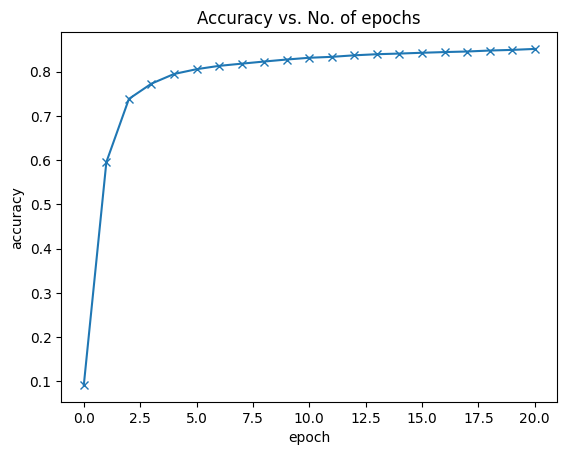

In [73]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')

In [74]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

In [77]:
img1, label = test_dataset[0]
plt.imshow(img1[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

TypeError: 'Image' object is not subscriptable

In [76]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

TypeError: 'Image' object is not subscriptable